# 1. 导入所需的包

In [1]:
import MySQLdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%pylab inline
#matplotlib正常显示中文
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签
mpl.rcParams['font.size'] = 12  #设置默认字体大小

Populating the interactive namespace from numpy and matplotlib


In [3]:
path = r'D:\03-CS\env\spider_case\sina\sinaweibo\data_analysis\\'

# 2. 从MySQL数据库中导入数据

In [4]:
#一定要加上charset='utf8', 否则会中文乱码
conn = MySQLdb.connect(host='127.0.0.1', port=3306, user='root', password='qiliwu2017', database='sina',charset='utf8')

In [5]:
weibotopic = pd.read_sql('select * from weibotopic', con=conn,index_col='domainId')

In [6]:
weibotopic[:5]

,topic,topic_url
domainId,,
1,互联网,http://v6.bang.weibo.com/czv/hulianwang?period...
10,星座,http://v6.bang.weibo.com/czv/xingzuo?period=month
101,科技观察,http://v6.bang.weibo.com/czv/kejiguancha?perio...
1015,婚庆服务,http://v6.bang.weibo.com/czv/hq?period=month
1043,设计美学,http://v6.bang.weibo.com/czv/sjmeixue?period=m...


In [7]:
topicuser = pd.read_sql('select * from topicuser', con=conn,index_col='uid')

In [8]:
topicuser[:5]

,domainId,rank,score,description,uname,user_url,img_url,following_num,follower_num,weibo_num,account_level,address,gender,birthday,college
uid,,,,,,,,,,,,,,,
1000124571,1,56,92.93,作家，代表作《互联网时代的浪漫与痛痒》 头条文章作者,工信布,http://weibo.com/u/1000124571,http://tva1.sinaimg.cn/crop.38.26.232.232.180/...,90,315686,5382,36,四川成都,male,,中国社会科学院研究生院
1001277790,30,42,94.11,知名互联网资讯博主 头条文章作者,印钱消费,http://weibo.com/u/1001277790,http://tvax1.sinaimg.cn/crop.0.0.996.996.180/3...,3320,13522,43222,39,北京朝阳区,male,,
1001961051,31,10,96.16,微博资深汽车博主 微博汽车视频帐号 微博故事原创作者 微博签约自媒体,百姓评车,http://weibo.com/bxpc,http://tvax3.sinaimg.cn/crop.0.0.1125.1125.180...,371,1230514,14619,36,北京,male,,
1002636584,7,49,92.63,知名情感博主,都市伊乡宁,http://weibo.com/275693355,http://tva3.sinaimg.cn/crop.0.0.512.512.180/3b...,1562,31484,353700,47,上海虹口区,male,双子座,海军工程大学
1002861732,23,82,94.13,资深记者 体育视频自媒体 微博签约自媒体,李武军,http://weibo.com/u/1002861732,http://tva1.sinaimg.cn/crop.0.0.512.512.180/3b...,408,2074999,14043,39,其他,male,,


In [9]:
weiboinfo = pd.read_sql('select * from weiboinfo', con=conn,index_col='mid')

In [10]:
weiboinfo[:5]

,uname,pub_date,weibotext,weiboimg,forward_nums,comment_nums,praised_nums
mid,,,,,,,
4118059860480856,鹿希-周杰,2017-06-13 06:10,分享图片 2杭州·浮力森林苑 ​​​​,https://wx1.sinaimg.cn/orj360/3fe0d456ly1fgj5q...,0,1,0
4118898955771381,鹿希-周杰,2017-06-15 13:44,@内裤都笑松了 @笑的合不拢腿 这是我这个月看过最好笑的笑话了,,0,0,2260
4125962679289538,鹿希-周杰,2017-07-05 01:33,张老师也辛苦啊,,0,1,13
4131997276700195,鹿希-周杰,2017-07-21 17:13,趁还没禁飞，多拍一些，杭州余杭的黄昏 2杭州·杭州西湖 L秒拍视频 ​​​​,,0,2,0
4137812527472104,鹿希-周杰,2017-08-06 18:20,#长胖20斤脸型变化#说多了都是泪 2杭州·杭州西湖 ​​​​,,0,13,8


# 3. 分析数据

In [11]:
domain_group = topicuser.groupby(['domainId']).mean()

In [12]:
domain_group.head()

,rank,score,following_num,follower_num,weibo_num,account_level
domainId,,,,,,
1,50.252525,93.580808,1479.767677,4.334206e+05,31306.000000,39.282828
10,50.500000,93.698900,478.720000,3.928126e+06,17185.950000,34.410000
101,25.500000,91.548800,1471.400000,7.436648e+05,20629.480000,44.140000
1015,50.821782,87.685743,1187.504950,1.267934e+05,5333.693069,38.049505
1043,50.500000,92.283700,798.650000,7.655081e+05,12952.640000,41.130000


In [13]:
topic_domain_group = pd.merge(domain_group, weibotopic, how='inner', left_index=True, right_index=True)

In [14]:
topic_domain_group.head()

,rank,score,following_num,follower_num,weibo_num,account_level,topic,topic_url
domainId,,,,,,,,
1,50.252525,93.580808,1479.767677,4.334206e+05,31306.000000,39.282828,互联网,http://v6.bang.weibo.com/czv/hulianwang?period...
10,50.500000,93.698900,478.720000,3.928126e+06,17185.950000,34.410000,星座,http://v6.bang.weibo.com/czv/xingzuo?period=month
101,25.500000,91.548800,1471.400000,7.436648e+05,20629.480000,44.140000,科技观察,http://v6.bang.weibo.com/czv/kejiguancha?perio...
1015,50.821782,87.685743,1187.504950,1.267934e+05,5333.693069,38.049505,婚庆服务,http://v6.bang.weibo.com/czv/hq?period=month
1043,50.500000,92.283700,798.650000,7.655081e+05,12952.640000,41.130000,设计美学,http://v6.bang.weibo.com/czv/sjmeixue?period=m...


3.1 各领域的平均粉丝数, 平均微博数

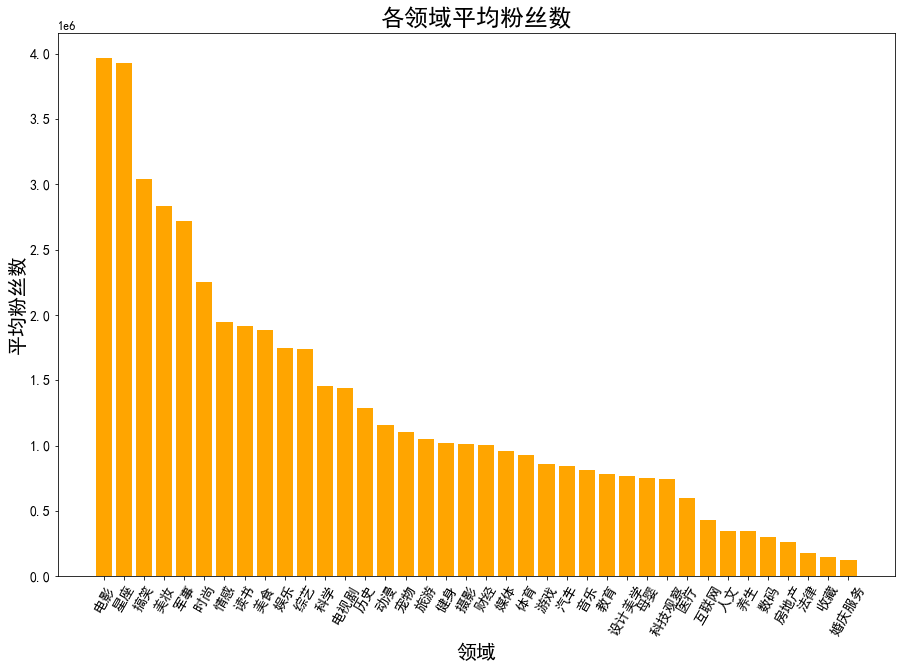

In [15]:
#平均粉丝数
plt.figure(figsize=(15, 10))
data_1 = topic_domain_group.sort_values(by='follower_num', ascending=False).reset_index(drop=True)
plt.bar(arange(38), data_1['follower_num'].values, width=0.8, color='orange')
plt.xticks(arange(38), data_1['topic'].values, fontsize=14, rotation=60)
plt.xlabel('领域', fontsize=20)
plt.ylabel('平均粉丝数', fontsize=20)
ax = plt.gca()
ax.yaxis.get_major_formatter().set_powerlimits((0,1)) 
plt.yticks(fontsize=14)
plt.title('各领域平均粉丝数', fontsize=24)
plt.savefig(path+'avg_follow_domain.png')
plt.show()

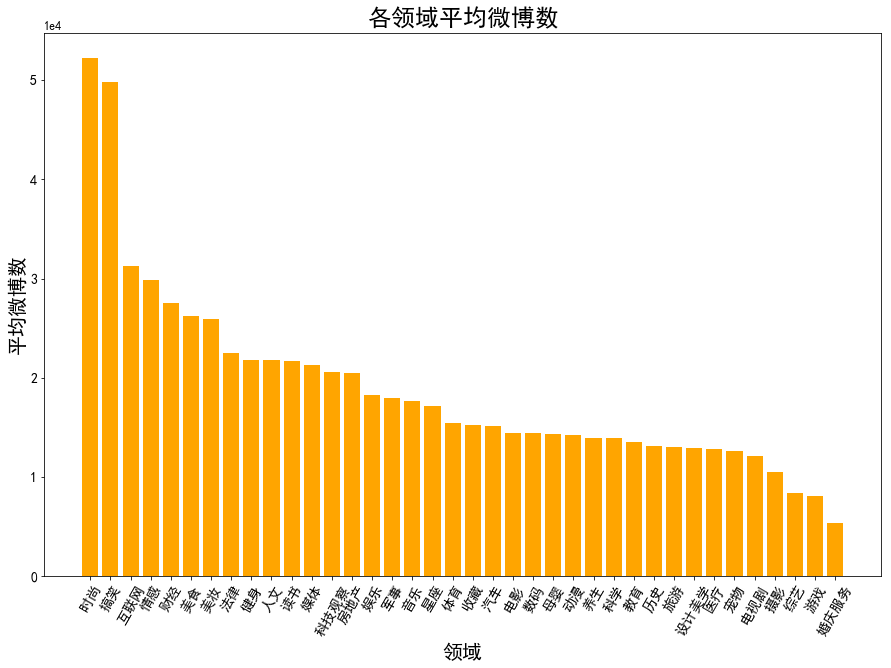

In [16]:
#平均微博数
plt.figure(figsize=(15, 10))
data_2 = topic_domain_group.sort_values(by='weibo_num', ascending=False).reset_index(drop=True)
plt.bar(arange(38), data_2['weibo_num'].values, width=0.8, color='orange')
plt.xticks(arange(38), data_2['topic'].values, fontsize=14, rotation=60)
plt.xlabel('领域', fontsize=20)
plt.ylabel('平均微博数', fontsize=20)
ax = plt.gca()
ax.yaxis.get_major_formatter().set_powerlimits((0,1)) 
plt.yticks(fontsize=14)
plt.title('各领域平均微博数', fontsize=24)
plt.savefig(path+'avg_weibo_domain.png')
plt.show()

3.2 各领域博主男女比

In [17]:
merge_data = pd.merge(weibotopic, topicuser, how='outer', left_index=True, right_on='domainId')

In [18]:
gender_data = pd.crosstab(merge_data['topic'], merge_data['gender'])

In [19]:
gender_data.head()

gender,female,male
topic,,
互联网,11,88
人文,35,65
体育,19,78
健身,53,42
养生,58,42


In [20]:
gender_pct = gender_data.div(gender_data.sum(1).astype(float), axis=0)

In [21]:
gender_pct.head()

gender,female,male
topic,,
互联网,0.111111,0.888889
人文,0.350000,0.650000
体育,0.195876,0.804124
健身,0.557895,0.442105
养生,0.580000,0.420000


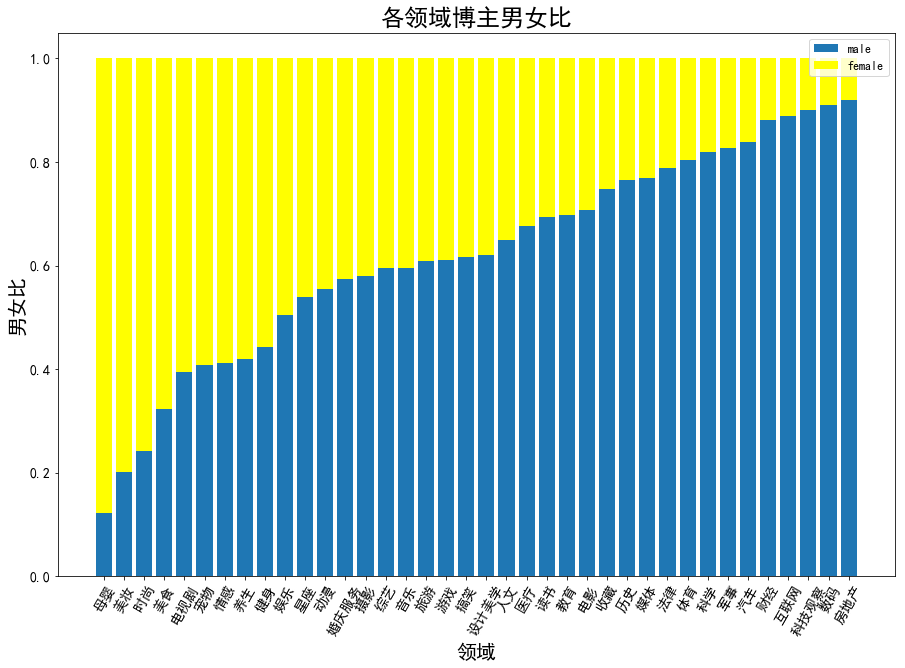

In [22]:
plt.figure(figsize=(15,10))
sorted_gender = gender_pct.sort_values(by='female', ascending=False)
plt.bar(arange(38), sorted_gender['male'].values, label='male')
plt.bar(arange(38), sorted_gender['female'].values, bottom=sorted_gender['male'].values, color='yellow', label='female')
plt.xticks(arange(38), sorted_gender.index.values, fontsize=14, rotation=60)
plt.yticks(fontsize=14)
plt.xlabel('领域',fontsize=20)
plt.ylabel('男女比', fontsize=20)
plt.title('各领域博主男女比', fontsize=24)
plt.legend()
plt.savefig(path+'gender_pct_domain.png')
plt.show()

3.3 粉丝最多的博主

In [23]:
follower_sorted_data = merge_data.sort_values(by='follower_num', ascending=False)

In [24]:
follower_sorted_data.ix[:10, ['topic', 'uname', 'description', 'follower_num', 'user_url']]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,topic,uname,description,follower_num,user_url
uid,,,,,
1344360230,美妆,Kevin凯文老师,著名造型师 微博签约自媒体,54654546,http://weibo.com/kevinchouwb
1249159055,读书,苏芩,知名作家，作品：《情场不输人，职场不输阵》《非常品红楼》《20岁跟对人，30岁做对事》等 头...,50009316,http://weibo.com/suqinbk
3200498577,综艺,我的偶像是二哔,微博知名娱乐博主 微博娱评团成员 娱乐综艺视频自媒体,41876454,http://weibo.com/idoloridiot
1713926427,搞笑,微博搞笑排行榜,知名搞笑幽默博主,41398502,http://weibo.com/topgirls8
1275017594,美妆,小P老师,著名造型师 微博签约自媒体,36037185,http://weibo.com/perry28pp
1740006601,美妆,牛尔,时尚达人 台湾知名美容专家 知名美妆博主 头条文章作者 微博签约自媒体,27584587,http://weibo.com/narukodlux
1601563722,读书,陆琪,畅销书作家、励志作家、编剧 微博签约自媒体,26246564,http://weibo.com/jdluqi
1644395354,搞笑,冷笑话精选,知名搞笑幽默博主,18066367,http://weibo.com/lxhjx
3884592975,搞笑,每日笑话百科,知名搞笑幽默博主,17928016,http://weibo.com/u/3884592975


3.4 发微博数最多的博主

In [25]:
weibo_sorted_data = merge_data.sort_values(by='weibo_num', ascending=False)
weibo_sorted_data.ix[:10, ['topic', 'uname', 'description', 'weibo_num', 'user_url']]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,topic,uname,description,weibo_num,user_url
uid,,,,,
1002636584,人文,都市伊乡宁,知名情感博主,353700,http://weibo.com/275693355
2132734472,时尚,北美省钱快报,知名时尚博主,311771,http://weibo.com/dealmoon
2822126673,健身,健身囚徒KK,知名运动博主 头条文章作者 微博签约自媒体,304036,http://weibo.com/u/2822126673
5674554136,搞笑,白菜分享君,知名时尚博主,280476,http://weibo.com/u/5674554136
2816393510,健身,懒人健身中心,深圳市蜘蛛侠文化传媒有限公司签约账号,268307,http://weibo.com/u/2816393510
2381947120,健身,减肥健身女王,深圳市小黄人文化传媒有限公司 作者 运动视频自媒体,253612,http://weibo.com/niurenbang
1364552715,房地产,陈宝存经济学家,房产专家 微博签约自媒体,252521,http://weibo.com/0a187
1959276064,互联网,没理想小姐,知名母婴育儿博主,246949,http://weibo.com/u/1959276064
2646917712,音乐,每一天都比昨天更接近五月天,知名音乐博主,231110,http://weibo.com/mayday55555329


3.6 微博点赞，评论，转发数评论

In [26]:
#点赞最多微博top10
weiboinfo.sort_values(by='praised_nums', ascending=False).ix[:10, ['uname', 'pub_date', 'weibotext','forward_nums',
       'comment_nums', 'praised_nums']]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,uname,pub_date,weibotext,forward_nums,comment_nums,praised_nums
mid,,,,,,
4242852412343076,肛正bu屙,2018-05-23 14:51,转发微博,0,0,2401960
4242865389086677,肛正bu屙,2018-05-23 15:43,转了,0,0,2401959
4244072607184862,陈超Casey,2018-05-26 23:40,壕无人性！好喜欢这样简简单单的方式！,0,0,2400787
4242552486374481,区块链克币哥,2018-05-22 18:59,直接抽汽车了。。。,6,2,2398551
4242864852966109,王飞-仓储物流与供应链,2018-05-23 15:41,#微博最贵抽奖#送奔驰， 牛逼啊！六一儿童节快乐！,5,3,2398546
4242580923610672,蚁工厂,2018-05-22 20:52,说不定能中呢//@来去之间: 转发并监督，不给就炸号//@卓哥哥:厉害了//@庆丰:厉害了/...,17,6,2398536
4243538264313862,IT杂货铺,2018-05-25 12:17,我如果，现在学驾驶证，是不是还来得及？,1,2,2398506
4242782379737046,霜叶,2018-05-23 10:13,这会超过两百万转发吧,89,128,2398245
4242612573680404,昊爷超新星,2018-05-22 22:58,昊昊我尽给别人抽奖了，这次断浪老哥抽奖我能中吗？试试看！,6,17,2161831


In [27]:
weiboinfo.columns

Index(['uname', 'pub_date', 'weibotext', 'weiboimg', 'forward_nums',
       'comment_nums', 'praised_nums'],
      dtype='object')

In [28]:
#转发最多微博top10
weiboinfo.sort_values(by='forward_nums', ascending=False).ix[:10, ['uname', 'pub_date', 'weibotext','forward_nums',
       'comment_nums', 'praised_nums']]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,uname,pub_date,weibotext,forward_nums,comment_nums,praised_nums
mid,,,,,,
4225093632447488,X玖少年团伍嘉成,2018-04-04 14:44,我严重怀疑我Mu怀孕！！！！！原地爆炸 ​​​​,261113,11956,13502
4220141879473059,X玖少年团伍嘉成,2018-03-21 22:48,#海草舞# 哈哈哈哈哈哈哈！被洗脑！ LX玖少年团伍嘉成的秒拍视频 ​​​​,217925,15470,30222
4218860976439221,X玖少年团伍嘉成,2018-03-18 09:58,早上好 ​​​​,208707,17670,29978
4219378720982538,X玖少年团伍嘉成,2018-03-19 20:15,#给你我的bigshow# 第一次玩，好好玩哈哈哈哈！快来跟我一起Show LX玖少年团伍...,205931,25313,30449
4220839468165349,X玖少年团伍嘉成,2018-03-23 21:00,300W福利来啦。快进来一起聊天吧！ O微博直播 ​​​​,202378,18708,12133
4237000972197604,X玖少年团伍嘉成,2018-05-07 11:20,猫奴的日常‍♂️ ​​​​,162199,8811,30126
4229947394322451,X玖少年团伍嘉成,2018-04-18 00:11,#哦我的皇帝陛下# 音源终于上线啦。第一次跟前辈合作，开心希望大家喜欢,154076,920,878
4230088611941990,X玖少年团伍嘉成,2018-04-18 09:33,早，报告班长，小伍偷偷染了个发！一周后回归黑发！哈哈哈哈！图一居然看不出来！ ​​​​,153850,31713,20875
4222849377824448,X玖少年团伍嘉成,2018-03-29 10:06,在沙发上撒尿？？好好期待一下变成公公的自己吧 LX玖少年团伍嘉成的秒拍视频 ​​​​,150822,10227,20021


In [29]:
#评论最多微博top10
weiboinfo.sort_values(by='comment_nums', ascending=False).ix[:10, ['uname', 'pub_date', 'weibotext','forward_nums',
       'comment_nums', 'praised_nums']]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,uname,pub_date,weibotext,forward_nums,comment_nums,praised_nums
mid,,,,,,
4238626638304174,微博搞笑排行榜,2018-05-11 23:00,20几岁还没谈过恋爱，会是什么心理状态 __________________________...,11462,83909,19834
4235365143457106,微博搞笑排行榜,2018-05-02 23:00,初中或高中的哪个瞬间，让你至今忘不了 ​​_________________________...,17889,82572,38066
4241163366009453,微博搞笑排行榜,2018-05-18 23:00,回忆起喜欢最久的那个人，你是什么心态 ___________________________...,17436,80558,39567
4237177086918657,微博搞笑排行榜,2018-05-07 23:00,你为喜欢的人，做过什么很傻很难忘的事情 __________________________...,12152,78664,28827
4238607231243764,微博搞笑排行榜,2018-05-11 21:42,留下一本你最近喜欢的书。喜欢同一本书的朋友，一起聊聊 ___________________...,7508,77507,24799
4242250513429160,微博搞笑排行榜,2018-05-21 23:00,留一句听上去很有意境的句子 ________________________________...,23682,77498,48512
4236089948449655,微博搞笑排行榜,2018-05-04 23:00,"给男朋友发消息说""我好像怀孕了""，他怎么回复 _______________________...",8264,73181,29162
4236452319970730,微博搞笑排行榜,2018-05-05 23:00,说一件你和同桌做过的，最有趣的事情 ____________________________...,13836,64416,26470
4235727531595880,微博搞笑排行榜,2018-05-03 23:00,大学的哪个瞬间，让你至今忘不了 ​​____________________________...,6639,63723,21105


3.7 制作各领域微博内容词云

In [30]:
from wordcloud import WordCloud, ImageColorGenerator
import jieba
from PIL import Image

In [31]:
with open(r'D:\03-CS\env\spider_case\sina\sinaweibo\data_analysis\stopwords.txt') as f:
    text = f.read()
    stopwords = set(word.strip() for word in text.split('\n'))

In [32]:
for word in ['展开','点击', '全文', '哈哈哈', '秒拍', '视频','真的']:
    stopwords.add(word) 

In [33]:
data = pd.merge(merge_data, weiboinfo, how='left', on='uname').ix[:,['topic', 'uname', 'weibotext']]
data.head()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,topic,uname,weibotext
0,互联网,工信布,#宽窄观察# 【领导干部容易读错的106个多音字，赶紧恶补一下吧】到时候即使遇到校长都卡壳的...
1,互联网,工信布,#宽窄思语# 人生如一个8字，兜兜转转，循环往复，最终还是回到原点。——公众号“八字路口”的...
2,互联网,工信布,#宽窄观察# “焦虑与质疑并不能创造价值，反而会阻碍我们迈向未来的脚步。能够让我们走向未来的...
3,互联网,工信布,#宽窄观察# 最近有一个网络新词：“睡后收入”。大致涉及三个行业：一是小三儿；二是明星的付费...
4,互联网,工信布,#宽窄观察#【 曰屯，刚柔始交而难生。——《易》】刚柔开始交流而出生艰难，险难中运动求得生存...


In [34]:
data = data.dropna()

In [35]:
text = data[data['topic']=='互联网']['weibotext']

In [36]:
def cloud(topicname): 
    path = r'D:\03-CS\env\spider_case\sina\sinaweibo\data_analysis\\'
    text = ' '.join(list(data[data['topic']==topicname]['weibotext'].values))
    parsed_text = ' '.join(jieba.cut(text))
    graph = Image.open(path+'weibo.jpg')
    image = numpy.array(graph)
    word_cloud = WordCloud(font_path=path+'simsun.ttf', stopwords=stopwords, background_color='white', mask=image)
    word_cloud.generate(parsed_text)
    image_color = ImageColorGenerator(image)
    word_cloud.recolor(color_func=image_color)
    plt.imshow(word_cloud, interpolation='bilinear')
   # plt.imshow(word_cloud.recolor(color_func=image_color))
    plt.axis('off')
    plt.savefig(path+topicname+'.png')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\1\AppData\Local\Temp\jieba.cache
Loading model cost 1.123 seconds.
Prefix dict has been built succesfully.


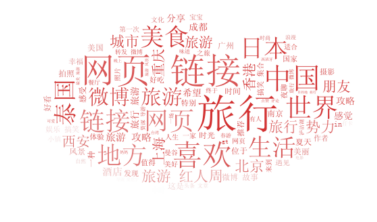

In [37]:
for topicname in set(data['topic'].values):
    cloud(topicname)

3.8 分析博主所属地区并可视化

In [39]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

In [40]:
cities_info = pd.read_excel(path+'2015Cities-CHINA.xlsx', index_col=0, parse_cols=[1,6,7])
cities_info.head()

,lon,lat
cities,,
重庆市,106.504959,29.533155
上海市,121.472641,31.231707
北京市,116.405289,39.904987
成都市,104.065735,30.659462
天津市,117.190186,39.125595


In [41]:
topicuser['address'].values

array(['四川成都', '北京朝阳区', '北京', ..., '北京东城区', '北京', '北京东城区'], dtype=object)

In [42]:
cities_info['count'] = np.array([0]*len(cities_info))

In [43]:
cities_info.head()

,lon,lat,count
cities,,,
重庆市,106.504959,29.533155,0
上海市,121.472641,31.231707,0
北京市,116.405289,39.904987,0
成都市,104.065735,30.659462,0
天津市,117.190186,39.125595,0


In [44]:
for i in range(len(topicuser)):
    for city in cities_info.index.values:
        if city[:-1] in topicuser.ix[i, 'address']:
            #某个城市的名称每出现一次，计数就加1
            cities_info.loc[city, 'count'] += 1
           

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
cities_info.head()


,lon,lat,count
cities,,,
重庆市,106.504959,29.533155,39
上海市,121.472641,31.231707,338
北京市,116.405289,39.904987,1075
成都市,104.065735,30.659462,64
天津市,117.190186,39.125595,29


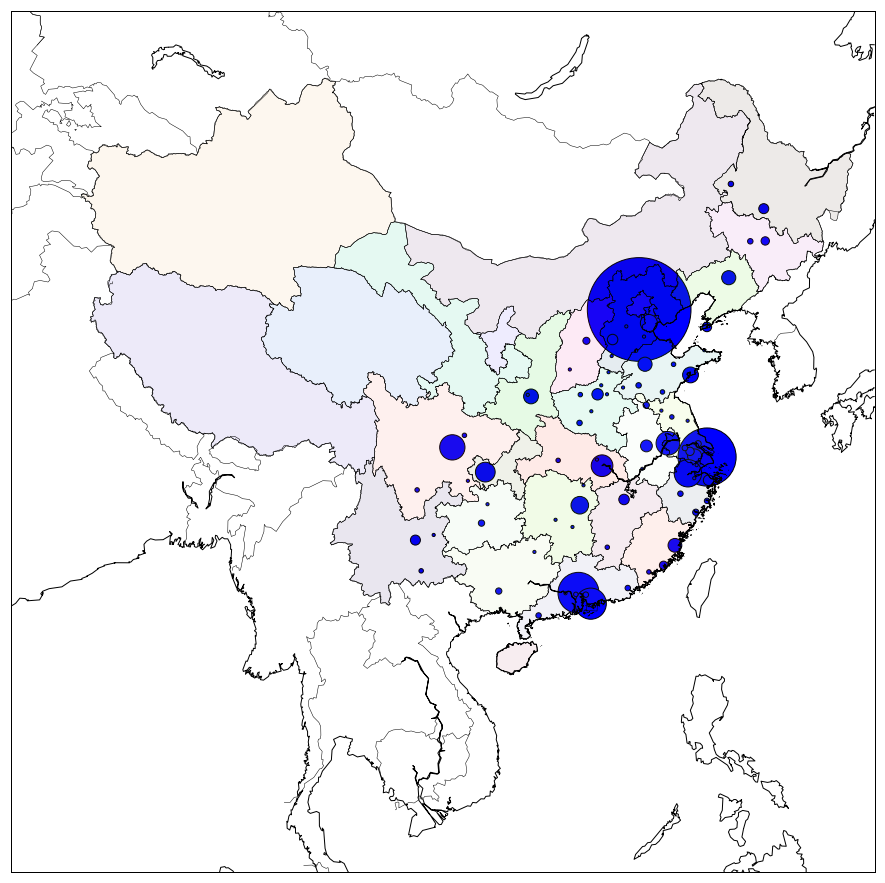

In [46]:
fig=plt.figure(figsize(15, 15))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
map = Basemap(projection='stere', 
              llcrnrlon=85,
             llcrnrlat=3.01,
             urcrnrlon=140,
             urcrnrlat=56.123,
             lat_0=42.5,
             lon_0=120,
             resolution='l',
              area_thresh=10000,
              rsphere=6371200.)

shp_info = map.readshapefile(path+'CHN_adm_shp\CHN_adm1','states',drawbounds=True)
#获得各省名称
province_list = set(item['NAME_1'] for item in map.states_info)  #'NAME_1'代表各省的名称
#各省填充不同颜色
for province in province_list:
    color = np.random.randint(0, 255, 3)/255
    for info, shp in zip(map.states_info, map.states):
        name = info['NAME_1']
        if name == province:
            poly = Polygon(shp,facecolor=color,edgecolor='k', lw=0.5, alpha=0.1) 
            ax1.add_patch(poly)
   
map.drawmapboundary()
map.drawstates()
map.drawcoastlines()
map.drawcountries()
#map.drawcounties()

#绘制城市分布散点图
x,y = map(cities_info['lon'].values, cities_info['lat'].values)
size = cities_info['count'].values*10
map.scatter(x, y, s=size, c='blue', edgecolor='black')
plt.savefig(path+'cities_distribution.png')
plt.show()

完毕！请多多指教！